In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

def test_method(method, a = -10, b = 10, n = 100, A=None, x=None, debug=True):
    if A is None:
        A = generate_matrix(a, b, n)
    if x is None:
        x = np.random.uniform(a, b, size=n)
    b = mul_matrix_by_vector(A, x)

    x_method = method(A, b)

    if debug:
        x_np = np.linalg.solve(A, b)
        print(f"Method absolute error: {norm(x - x_method)}")
        print(f"Numpy absolute error: {norm(x - x_np)}")

    return norm(x - x_method)


def norm(vector):
    return np.sqrt(sum(x**2 for x in vector))

def mul_matrix_by_vector(matrix, vector):
    assert len(matrix[0]) == len(vector)
    return np.array([sum(matrix[i][j] * vector[j] for j in range(len(vector))) for i in range(len(matrix))])

def get_diag_dom(A):
    return max(abs(A[i][i]) - sum(abs(A[i][j]) if j != i else 0 for j in range(len(A))) for i in range(len(A)))

def generate_matrix(a, b, n, diag=None):
    A = np.random.uniform(a, b, (n, n))
    if diag is not None:
        for i in range(len(A)):
            A[i][i] += diag * sum(abs(A[i][j]) if j != i else 0 for j in range(n))
    return A


def gauss(A, b):
    n = len(A)
    A = deepcopy(A)
    b = deepcopy(b)

    for i in range(n - 1):
        if A[i][i] == 0:
            for j in range(i + 1, n):
                if A[j][i] != 0:
                    A[i], A[j] = A[j], A[i]
                    break

        for j in range(i + 1, n):
            f = A[j][i] / A[i][i]
            A[j] -= f * A[i]
            b[j] -= f * b[i]

    x = np.zeros(shape=(n, ))

    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]

    return np.array(x)

def gauss_column(A, b):
    n = len(A)
    A = deepcopy(A)
    b = deepcopy(b)

    for i in range(n - 1):
        max_index = np.argmax(np.abs(A[i:, i])) + i
        A[[i, max_index]] = A[[max_index , i]]
        b[i], b[max_index] = b[max_index], b[i]
        for j in range(i + 1, n):
            f = A[j][i] / A[i][i]
            A[j] -= f * A[i]
            b[j] -= f * b[i]

    x = np.zeros(shape=(n, ))

    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]

    return np.array(x)


def gauss_row(A, b):
    n = len(A)
    A = deepcopy(A)
    b = deepcopy(b)
    x_i = [i for i in range(n)]

    for i in range(n - 1):
        max_index = np.argmax(np.abs(A[i, i:])) + i
        x_i[i], x_i[max_index] = x_i[max_index], x_i[i]
        for j in range(n):
            A[j][i], A[j][max_index] = A[j][max_index], A[j][i]
        for j in range(i + 1, n):
            f = A[j][i] / A[i][i]
            A[j] -= f * A[i]
            b[j] -= f * b[i]

    x = np.zeros(shape=(n, ))

    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]

    x_copy = deepcopy(x)

    for i, order in enumerate(x_i):
        x[order] = x_copy[i]

    return np.array(x)


def gauss_row_and_column(A, b):
    n = len(A)
    A = deepcopy(A)
    b = deepcopy(b)
    x_i = [i for i in range(n)]

    for i in range(n - 1):
        max_index_col = np.argmax(np.abs(A[i:, i])) + i
        max_index_row = np.argmax(np.abs(A[i, i:])) + i
        if A[max_index_col][i] > A[i][max_index_row]:
            A[[i, max_index_col]] = A[[max_index_col , i]]
            b[i], b[max_index_col] = b[max_index_col], b[i]
        else:
            x_i[i], x_i[max_index_row] = x_i[max_index_row], x_i[i]
            for j in range(n):
                A[j][i], A[j][max_index_row] = A[j][max_index_row], A[j][i]

        for j in range(i + 1, n):
            f = A[j][i] / A[i][i]
            A[j] -= f * A[i]
            b[j] -= f * b[i]

    x = np.zeros(shape=(n, ))

    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]

    x_copy = deepcopy(x)

    for i, order in enumerate(x_i):
        x[order] = x_copy[i]

    return np.array(x)

In [2]:
n = 5
A = generate_matrix(-10, 10, n)
x = np.random.uniform(-10, 10, n)
print("Classic")
test_method(gauss, A=A, x=x)
print("Columns")
test_method(gauss_column, A=A, x=x)
print("Rows")
test_method(gauss_row, A=A, x=x)
print("Columns and rows")
test_method(gauss_row_and_column, A=A, x=x)

Classic
Method absolute error: 3.94040033080556e-14
Numpy absolute error: 2.395201647715659e-14
Columns
Method absolute error: 2.395201647715659e-14
Numpy absolute error: 2.395201647715659e-14
Rows
Method absolute error: 2.7379099239862994e-14
Numpy absolute error: 2.395201647715659e-14
Columns and rows
Method absolute error: 2.503103621450356e-14
Numpy absolute error: 2.395201647715659e-14


2.503103621450356e-14

[1.8283242358490794e-13, 1.3557268532196462e-13, 1.1838956710871202e-13, 1.1625961044686886e-13]
[1.8947289355176264e-13, 1.370089835797349e-13, 1.1797046396662474e-13, 1.1725454047414458e-13]


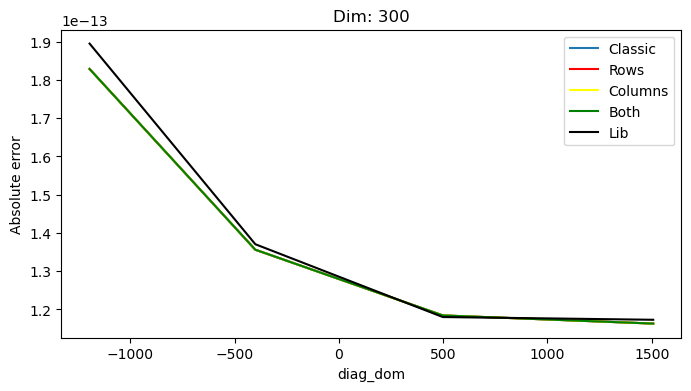

In [9]:
dims = [10, 100, 300]
coofs = [i * 0.1 for i in range(1, 22, 3)]

for dim in dims:
    x = []
    y_classic = []
    y_rows = []
    y_columns = []
    y_both = []
    y_np = []
    for coof in coofs:
        A = generate_matrix(-10, 10, dim, diag=coof)
        x_vec = np.random.uniform(-10, 10, dim)
        x.append(get_diag_dom(A))
        y_classic.append(test_method(gauss, A=A, x=x_vec, debug=False))
        y_rows.append(test_method(gauss_row, A=A, x=x_vec, debug=False))
        y_columns.append(test_method(gauss_column, A=A, x=x_vec, debug=False))
        y_both.append(test_method(gauss_row_and_column, A=A, x=x_vec, debug=False))
        y_np.append(test_method(np.linalg.solve, A=A, x=x_vec, debug=False))
    plt.figure(figsize=(8, 4))
    plt.title(f'Dim: {dim}')
    plt.xlabel("diag_dom")
    plt.ylabel("Absolute error")
    plt.plot(x, y_classic, label='Classic')
    plt.plot(x, y_rows, label='Rows', color='red')
    plt.plot(x, y_columns, label='Columns', color='yellow')
    plt.plot(x, y_both, label='Both', color='green')
    plt.plot(x, y_np, label='Lib', color='black')
    plt.legend()
    plt.show()